## Model Training

### 1.1)Import Data and required packages
### Import matplotlib,pandas,numpy,searborn,warnings,

In [10]:
#basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#modellling imports
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

### Import the CSV Data as Pandas DataFrame

In [11]:
df = pd.read_csv('data/stud.csv')

### Show the first 5 top records



In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and Y variable

In [13]:
X = df.drop(columns=['math_score'],axis=1)


In [14]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [15]:
print('Categories in Gender is: ', end=' ')
print(df['gender'].unique())

print('Categories in Race ethnicity is: ', end=' ')
print(df['race_ethnicity'].unique())

print('Categories in Race parental level of education is: ', end=' ')
print(df['parental_level_of_education'].unique())

print('Categories in lunch 	 is: ', end=' ')
print(df['lunch'].unique())

print('Categories in test_preparation_course is: ', end=' ')
print(df['test_preparation_course'].unique())


Categories in Gender is:  ['female' 'male']
Categories in Race ethnicity is:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in Race parental level of education is:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch 	 is:  ['standard' 'free/reduced']
Categories in test_preparation_course is:  ['none' 'completed']


In [16]:
Y = df['math_score']

In [17]:
Y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [18]:
#create a column tarnsformer with 3 types of transformers

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ('OneHotEncoder',oh_transformer,cat_features),
    ('StandardScaler',numeric_transformer,num_features),
])


In [19]:
X = preprocessor.fit_transform(X)

In [20]:
X.shape

(1000, 19)

In [21]:
#separate the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

### Create an Evaluate Function to give metrics after model training

In [22]:
def evaluate_model(true,predicted):
  mae = mean_absolute_error(true,predicted)
  mse = mean_squared_error(true,predicted)
  rmse = np.sqrt(mean_squared_error(true,predicted))
  r2_square = r2_score(true,predicted)
  return mae,rmse,r2_square

In [23]:
models = {
    "Linear Regression: ": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge":Ridge(),
    "K_Neigbours Regressor": KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random forest regressor": RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "Cat Bosting Regressor " : CatBoostRegressor(),
    "AdaBoost regressor " : AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(X_train,Y_train)  #Model training

  #make predictions
  Y_train_pred = model.predict(X_train)
  Y_test_pred = model.predict(X_test)

  #Evaluate train and test dataset
  model_train_mae,model_train_rmse,model_train_r2 = evaluate_model(Y_train,Y_train_pred)
  model_test_mae,model_test_rmse,model_test_r2 = evaluate_model(Y_test,Y_test_pred)

  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])


  #model performance 
  print('Model Performing for the training dataset')
  print("-Root Mean Squared Error: {:.4f}".format(model_train_rmse))
  print("-Mean Absolute Error: {:.4f}".format(model_train_mae))
  print("-Root Mean Squared Error: {:.4f}".format(model_train_r2))

  print('+'*35)
  print('Model Performing for the test dataset')
  print("-Root Mean Squared Error: {:.4f}".format(model_test_rmse))
  print("-Mean Absolute Error: {:.4f}".format(model_test_mae))
  print("-Root Mean Squared Error: {:.4f}".format(model_test_r2))

  r2_list.append(model_test_r2)


  print('='*35)
  print('\n')

Linear Regression: 
Model Performing for the training dataset
-Root Mean Squared Error: 5.3276
-Mean Absolute Error: 4.2691
-Root Mean Squared Error: 0.8741
+++++++++++++++++++++++++++++++++++
Model Performing for the test dataset
-Root Mean Squared Error: 5.4185
-Mean Absolute Error: 4.2234
-Root Mean Squared Error: 0.8793


Lasso
Model Performing for the training dataset
-Root Mean Squared Error: 6.5938
-Mean Absolute Error: 5.2063
-Root Mean Squared Error: 0.8071
+++++++++++++++++++++++++++++++++++
Model Performing for the test dataset
-Root Mean Squared Error: 6.5197
-Mean Absolute Error: 5.1579
-Root Mean Squared Error: 0.8253


Ridge
Model Performing for the training dataset
-Root Mean Squared Error: 5.3233
-Mean Absolute Error: 4.2650
-Root Mean Squared Error: 0.8743
+++++++++++++++++++++++++++++++++++
Model Performing for the test dataset
-Root Mean Squared Error: 5.3904
-Mean Absolute Error: 4.2111
-Root Mean Squared Error: 0.8806


K_Neigbours Regressor
Model Performing for t

### Results

In [24]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression:,0.879345
7,Cat Bosting Regressor,0.851632
8,AdaBoost regressor,0.849930
5,Random forest regressor,0.849876
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K_Neigbours Regressor,0.783813
4,Decision Tree,0.734773


### Linear Regression

In [25]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,Y_train)
Y_pred = lin_model.predict(X_test)
score = r2_score(Y_test,Y_pred)*100
print('The accuray of the model is: %.2f' %score)

The accuray of the model is: 87.93


### Plot Y_pred and Y_test

Text(0, 0.5, 'Predicted')

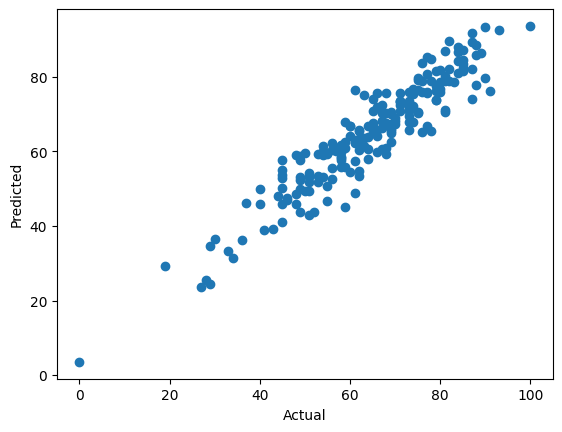

In [26]:
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='math_score'>

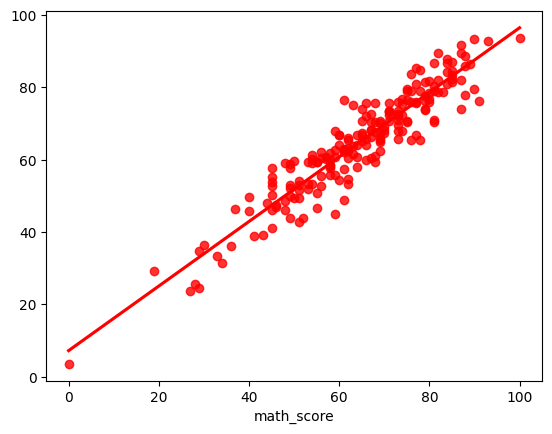

In [27]:
sns.regplot(x=Y_test,y=Y_pred,ci=None,color='red')

### Difference betweeen Actual and Predicted values

In [28]:
pred_df = pd.DataFrame({'Actual values': Y_test,'Predicted values': Y_pred,'Difference':Y_test-Y_pred})
pred_df

,Actual values,Predicted values,Difference
521,91,76.18750,14.81250
737,53,59.21875,-6.21875
740,80,76.81250,3.18750
660,74,76.81250,-2.81250
411,84,87.96875,-3.96875
...,...,...,...
408,52,43.78125,8.21875
332,62,62.40625,-0.40625
208,74,67.81250,6.18750
613,65,66.84375,-1.84375
